In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

# 데이터 준비

In [118]:
df=pd.read_csv('rectal_NET2.csv',encoding='utf-8-sig')

# 데이터프레임 확인
df.head()

,성별,진단시 나이,절제전 육안적 크기,절제전 육안적 분류,병변의 모양,Surface change,Surface color,병변의 위치,시술 시행 의사,시술 방법,...,Tumor size(조직검사 결과상 종양의 크기),Tumor size(조직검사 결과상 종양의 크기)구분,deep margin 인지 lateral margin인지 모르는 경우,Basal or lateral,LVI,Synchronous NET,Synchronous lesion 치료,구제 치료 시행 방법,elapsed_days,구제치료 시 residual lesion 유무
0,2,46,14,2,1,3,1,3,2,9,...,13.0,1,0.0,1,0,0.0,0.0,7,50,0
1,2,75,7,2,1,1,2,2,1,9,...,5.0,0,0.0,1,0,0.0,0.0,8,30,0
2,2,78,6,2,3,1,1,3,3,4,...,4.0,0,0.0,1,1,0.0,0.0,4,77,1
3,1,41,6,2,1,1,1,3,3,4,...,6.0,0,1.0,1,0,1.0,2.0,9,39,0
4,1,57,4,1,1,1,1,3,3,4,...,3.0,0,1.0,1,0,0.0,0.0,7,44,1


In [119]:
# 결측치 처리 (간단하게 결측치를 제거합니다. 다른 방법으로 대체할 수도 있습니다.)
df = df.dropna()

In [120]:
df2 = df.copy(deep=True)
# 숫자형 변수
num_cols=['진단시 나이', 'elapsed_days']
print(len(num_cols))
# 범주형 변수
cat_cols = list(df2.columns)
for v  in df[num_cols]:
#     print(v)
    cat_cols.remove(v)
print(len(cat_cols))
for col in cat_cols:
    # print(col)
    if col=='구제치료 시 residual lesion 유무': continue
    df2[col] = df2[col].astype('category')

2
24


In [121]:
# 범주형 변수를 더미 변수로 변환
df2 = pd.get_dummies(df, drop_first=True)

In [122]:
df2.head()

,성별,진단시 나이,절제전 육안적 크기,절제전 육안적 분류,병변의 모양,Surface change,Surface color,병변의 위치,시술 시행 의사,시술 방법,...,Tumor size(조직검사 결과상 종양의 크기),Tumor size(조직검사 결과상 종양의 크기)구분,deep margin 인지 lateral margin인지 모르는 경우,Basal or lateral,LVI,Synchronous NET,Synchronous lesion 치료,구제 치료 시행 방법,elapsed_days,구제치료 시 residual lesion 유무
0,2,46,14,2,1,3,1,3,2,9,...,13.0,1,0.0,1,0,0.0,0.0,7,50,0
1,2,75,7,2,1,1,2,2,1,9,...,5.0,0,0.0,1,0,0.0,0.0,8,30,0
2,2,78,6,2,3,1,1,3,3,4,...,4.0,0,0.0,1,1,0.0,0.0,4,77,1
3,1,41,6,2,1,1,1,3,3,4,...,6.0,0,1.0,1,0,1.0,2.0,9,39,0
4,1,57,4,1,1,1,1,3,3,4,...,3.0,0,1.0,1,0,0.0,0.0,7,44,1


In [123]:
# 타겟 변수와 피처 분리
X = df2.drop(columns=['구제치료 시 residual lesion 유무'])
y = df2['구제치료 시 residual lesion 유무']

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 모델 훈련 및 평가

## 로지스틱 회귀 (Logistic Regression)

In [124]:
# 로지스틱 회귀 모델 훈련
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# 예측
y_pred_log_reg = log_reg.predict(X_test)

# 성능 평가
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
# 예측 확률
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

# AUC 값 계산
auc_log_reg = roc_auc_score(y_test, y_pred_prob_log_reg)
print("AUC:", auc_log_reg)

Logistic Regression:
Accuracy: 0.7894736842105263
Confusion Matrix:
 [[36  3]
 [ 9  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86        39
           1       0.75      0.50      0.60        18

    accuracy                           0.79        57
   macro avg       0.78      0.71      0.73        57
weighted avg       0.78      0.79      0.78        57

AUC: 0.8133903133903133


## 랜덤 포레스트 (Random Forest)

In [125]:
# 랜덤 포레스트 모델 훈련
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측
y_pred_rf = rf.predict(X_test)

# 성능 평가
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
# 예측 확률
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# AUC 값 계산
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print("AUC:", auc_rf)


Random Forest:
Accuracy: 0.9298245614035088
Confusion Matrix:
 [[39  0]
 [ 4 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        39
           1       1.00      0.78      0.88        18

    accuracy                           0.93        57
   macro avg       0.95      0.89      0.91        57
weighted avg       0.94      0.93      0.93        57

AUC: 0.878917378917379


## 그라디언트 부스팅 (Gradient Boosting)

In [126]:
# 그라디언트 부스팅 모델 훈련
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# 예측
y_pred_gb = gb.predict(X_test)

# 성능 평가
print("\nGradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

# 예측 확률
y_pred_prob_gb = gb.predict_proba(X_test)[:, 1]

# AUC 값 계산
auc_gb = roc_auc_score(y_test, y_pred_prob_gb)
print("AUC:", auc_gb)


Gradient Boosting:
Accuracy: 0.7894736842105263
Confusion Matrix:
 [[34  5]
 [ 7 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        39
           1       0.69      0.61      0.65        18

    accuracy                           0.79        57
   macro avg       0.76      0.74      0.75        57
weighted avg       0.78      0.79      0.79        57

AUC: 0.8233618233618234


## XGBoost 모델 훈련 및 평가

In [127]:
# 타겟 변수와 피처 분리
X = df.drop(columns=['구제치료 시 residual lesion 유무'])
y = df['구제치료 시 residual lesion 유무']

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [128]:
# XGBoost 모델 훈련
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb.predict(X_test)

# 성능 평가
print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
# 예측 확률
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]
# AUC 값 계산
auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
print("AUC:", auc_xgb)

XGBoost:
Accuracy: 0.9122807017543859
Confusion Matrix:
 [[38  1]
 [ 4 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94        39
           1       0.93      0.78      0.85        18

    accuracy                           0.91        57
   macro avg       0.92      0.88      0.89        57
weighted avg       0.91      0.91      0.91        57

AUC: 0.8190883190883191


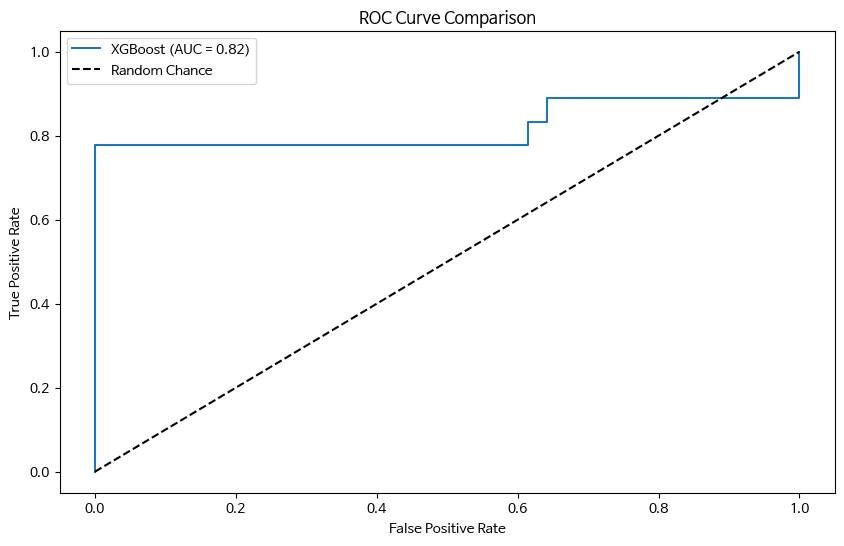

In [129]:
# ROC 커브 데이터 계산
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)

# ROC 커브 그리기
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

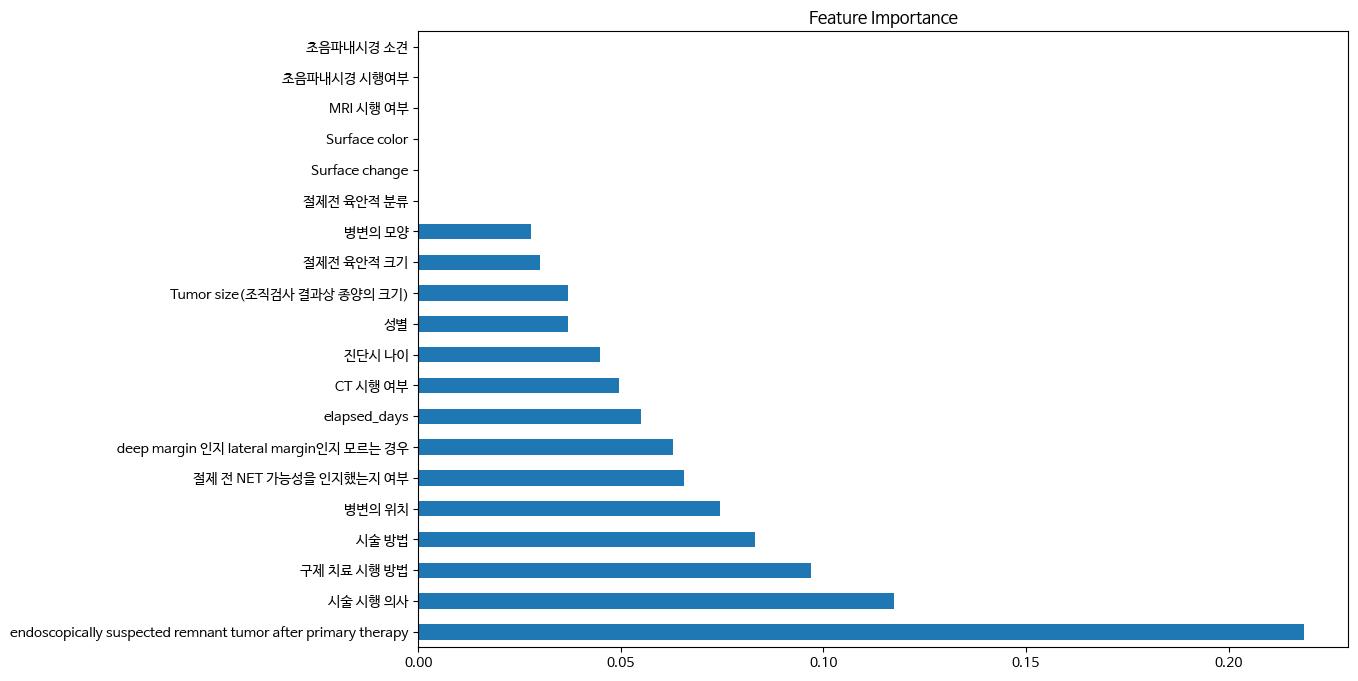

In [130]:
# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
feature_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

# 성능 개선

## baseline

In [132]:
# XGBoost 모델 훈련
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb.predict(X_test)

# 성능 평가
print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
# 예측 확률
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]
# AUC 값 계산
auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
print("AUC:", auc_xgb)

XGBoost:
Accuracy: 0.9122807017543859
Confusion Matrix:
 [[38  1]
 [ 4 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94        39
           1       0.93      0.78      0.85        18

    accuracy                           0.91        57
   macro avg       0.92      0.88      0.89        57
weighted avg       0.91      0.91      0.91        57

AUC: 0.8190883190883191


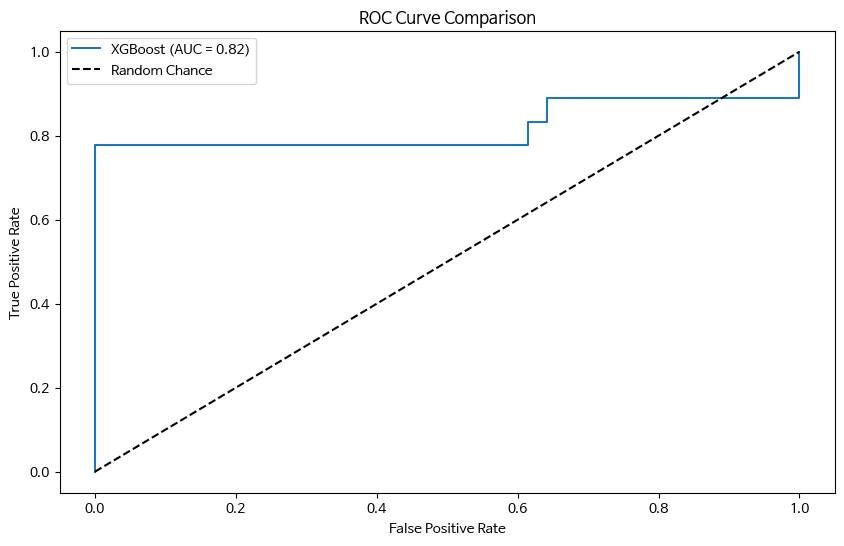

In [133]:
# ROC 커브 데이터 계산
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)

# ROC 커브 그리기
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

### 결측값 처리

In [134]:
# 컬럼별 결측치 파악하기
df.isna().sum()

성별                                                              0
진단시 나이                                                          0
절제전 육안적 크기                                                      0
절제전 육안적 분류                                                      0
병변의 모양                                                          0
Surface change                                                  0
Surface color                                                   0
병변의 위치                                                          0
시술 시행 의사                                                        0
시술 방법                                                           0
절제 전 NET 가능성을 인지했는지 여부                                          0
CT 시행 여부                                                        0
MRI 시행 여부                                                       0
초음파내시경 시행여부                                                     0
초음파내시경 소견                                                       0
endoscopic

### 피처 스케일링

In [135]:
# 숫자형 변수
num_cols=['진단시 나이', '절제전 육안적 크기', 'Tumor size(조직검사 결과상 종양의 크기)', 'elapsed_days']
# 범주형 변수
cat_cols = list(df.columns)
for v  in df[num_cols]:
#     print(v)
    cat_cols.remove(v)

In [136]:
# from sklearn.preprocessing import StandardScaler

# # 수치형 변수 스케일링
# scaler = StandardScaler()
# df[num_cols] = scaler.fit_transform(df[num_cols])

In [137]:
# 타겟 변수와 피처 분리
X = df.drop(columns=['구제치료 시 residual lesion 유무'])
y = df['구제치료 시 residual lesion 유무']

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [138]:
df

,성별,진단시 나이,절제전 육안적 크기,절제전 육안적 분류,병변의 모양,Surface change,Surface color,병변의 위치,시술 시행 의사,시술 방법,...,Tumor size(조직검사 결과상 종양의 크기),Tumor size(조직검사 결과상 종양의 크기)구분,deep margin 인지 lateral margin인지 모르는 경우,Basal or lateral,LVI,Synchronous NET,Synchronous lesion 치료,구제 치료 시행 방법,elapsed_days,구제치료 시 residual lesion 유무
0,2,46,14,2,1,3,1,3,2,9,...,13.0,1,0.0,1,0,0.0,0.0,7,50,0
1,2,75,7,2,1,1,2,2,1,9,...,5.0,0,0.0,1,0,0.0,0.0,8,30,0
2,2,78,6,2,3,1,1,3,3,4,...,4.0,0,0.0,1,1,0.0,0.0,4,77,1
3,1,41,6,2,1,1,1,3,3,4,...,6.0,0,1.0,1,0,1.0,2.0,9,39,0
4,1,57,4,1,1,1,1,3,3,4,...,3.0,0,1.0,1,0,0.0,0.0,7,44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,1,41,3,1,1,1,1,2,1,6,...,0.0,1,0.0,1,0,0.0,1.0,6,15,0
186,2,43,3,1,1,1,1,2,1,6,...,0.0,1,0.0,1,0,0.0,1.0,7,41,0
187,2,67,3,1,1,1,1,2,1,4,...,0.0,1,0.0,1,0,0.0,1.0,3,14,0
188,1,76,7,2,3,1,1,3,3,4,...,0.0,1,1.0,1,0,0.0,1.0,7,13,1


### 하이퍼파라미터 튜닝

In [101]:
from sklearn.model_selection import GridSearchCV

# XGBoost 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [220, 250, 270],
    'learning_rate': [0.11, 0.12, 0.14],
    'max_depth': [3,4, 5],
    'subsample': [0.8, 0.9,1.0],
    'colsample_bytree': [0.8,0.9, 1.0]
}

grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=5, scoring='f1', n_jobs=-1,error_score='raise')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.12, 'max_depth': 4, 'n_estimators': 270, 'subsample': 0.9}


In [102]:
# best_model.fit(X_train, y_train)

# 예측
y_pred_xgb = best_model.predict(X_test)

# 성능 평가
print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
# 예측 확률
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]
# AUC 값 계산
auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
print("AUC:", auc_xgb)

XGBoost:
Accuracy: 0.8947368421052632
Confusion Matrix:
 [[37  2]
 [ 4 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92        39
           1       0.88      0.78      0.82        18

    accuracy                           0.89        57
   macro avg       0.89      0.86      0.87        57
weighted avg       0.89      0.89      0.89        57

AUC: 0.8190883190883191


### 스태킹 (Stacking)

In [103]:
# 스태킹 모델
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=True, eval_metric='logloss'))
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred_stacking = stacking_model.predict(X_test)
print("Stacking Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stacking))
print("Classification Report:\n", classification_report(y_test, y_pred_stacking))

# 예측 확률
y_pred_prob_stacking_model = stacking_model.predict_proba(X_test)[:, 1]
# AUC 값 계산
auc_stacking_model = roc_auc_score(y_test, y_pred_prob_stacking_model)
print("AUC:", auc_stacking_model)

Stacking Model:
Accuracy: 0.8771929824561403
Confusion Matrix:
 [[39  0]
 [ 7 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        39
           1       1.00      0.61      0.76        18

    accuracy                           0.88        57
   macro avg       0.92      0.81      0.84        57
weighted avg       0.90      0.88      0.87        57

AUC: 0.886039886039886


### 교차 검증

In [104]:
from sklearn.model_selection import cross_val_score

# XGBoost 모델의 교차 검증
cross_val_scores = cross_val_score(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), X, y, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", np.mean(cross_val_scores))

Cross-Validation Scores: [0.55263158 0.65789474 0.78947368 0.81578947 0.68421053]
Mean Cross-Validation Score: 0.7


### 피처 선택

In [105]:
from sklearn.feature_selection import SelectFromModel

# 피처 선택
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
selection = SelectFromModel(model, prefit=True)
X_train_selected = selection.transform(X_train)
X_test_selected = selection.transform(X_test)

# 선택된 피처로 모델 훈련 및 평가
model_selected = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_selected.fit(X_train_selected, y_train)
y_pred_selected = model_selected.predict(X_test_selected)
print("XGBoost with Selected Features:")
print("Accuracy:", accuracy_score(y_test, y_pred_selected))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_selected))
print("Classification Report:\n", classification_report(y_test, y_pred_selected))

D:\envs\datapre\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\envs\datapre\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


XGBoost with Selected Features:
Accuracy: 0.8771929824561403
Confusion Matrix:
 [[36  3]
 [ 4 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        39
           1       0.82      0.78      0.80        18

    accuracy                           0.88        57
   macro avg       0.86      0.85      0.86        57
weighted avg       0.88      0.88      0.88        57



### 하이퍼파라미터 튜닝과 교차검증

In [106]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝 및 교차검증 수행
grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 예측 및 성능 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("XGBoost with Hyperparameter Tuning and Cross-Validation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# 예측 확률
y_pred_prob_best_model = best_model.predict_proba(X_test)[:, 1]
# AUC 값 계산
auc_best_model = roc_auc_score(y_test, y_pred_prob_best_model)
print("AUC:", auc_best_model)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
XGBoost with Hyperparameter Tuning and Cross-Validation:
Accuracy: 0.8771929824561403
Confusion Matrix:
 [[38  1]
 [ 6 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.92        39
           1       0.92      0.67      0.77        18

    accuracy                           0.88        57
   macro avg       0.89      0.82      0.84        57
weighted avg       0.88      0.88      0.87        57

AUC: 0.8219373219373218


### 앙상블 기법과 교차검증을 조합

In [107]:
# 엑셀 파일 읽기
df=pd.read_csv('rectal_NET2.csv',encoding='utf-8-sig')


# 범주형 변수를 더미 변수로 변환
df = pd.get_dummies(df, drop_first=True)

# 수치형 변수 스케일링
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# 타겟 변수와 피처 분리
X = df.drop(columns=['구제치료 시 residual lesion 유무'])
y = df['구제치료 시 residual lesion 유무']

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 베이스 모델 정의
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=500, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# 스태킹 앙상블 정의
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)

# 교차검증을 통해 성능 평가
cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='f1')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# 최종 모델 훈련
stacking_model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = stacking_model.predict(X_test)
print("Stacking Ensemble Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# 예측 확률
y_pred_prob_stacking_model = stacking_model.predict_proba(X_test)[:, 1]
# AUC 값 계산
auc_stacking_model = roc_auc_score(y_test, y_pred_prob_stacking_model)
print("AUC:", auc_stacking_model)

Cross-Validation Scores: [0.57142857 0.66666667 0.66666667 0.33333333 0.5       ]
Mean Cross-Validation Score: 0.5476190476190477
Stacking Ensemble Model:
Accuracy: 0.8070175438596491
Confusion Matrix:
 [[38  1]
 [10  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87        39
           1       0.89      0.44      0.59        18

    accuracy                           0.81        57
   macro avg       0.84      0.71      0.73        57
weighted avg       0.82      0.81      0.78        57

AUC: 0.8433048433048433


In [108]:
# 피처 중요도 추출
feature_importances = pd.Series(xgb.feature_importances_, index=X.columns)
print(feature_importances.nlargest(10))

endoscopically suspected remnant tumor after primary therapy    0.218651
시술 시행 의사                                                        0.117350
구제 치료 시행 방법                                                     0.096881
시술 방법                                                           0.083168
병변의 위치                                                          0.074517
절제 전 NET 가능성을 인지했는지 여부                                          0.065673
deep margin 인지 lateral margin인지 모르는 경우                          0.062744
elapsed_days                                                    0.054893
CT 시행 여부                                                        0.049464
진단시 나이                                                          0.044939
dtype: float32


In [109]:
idf = pd.DataFrame(feature_importances.nlargest(10))
idf

,0
endoscopically suspected remnant tumor after primary therapy,0.218651
시술 시행 의사,0.117350
구제 치료 시행 방법,0.096881
시술 방법,0.083168
병변의 위치,0.074517
절제 전 NET 가능성을 인지했는지 여부,0.065673
deep margin 인지 lateral margin인지 모르는 경우,0.062744
elapsed_days,0.054893
CT 시행 여부,0.049464
진단시 나이,0.044939


# 로지스틱 리그레션으로 스코어링 시스템 만들기

In [139]:
# 로지스틱 회귀 모델 훈련
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

endoscopically suspected remnant tumor after primary therapy    1.924729
CT 시행 여부                                                        0.981219
병변의 모양                                                          0.789683
Synchronous lesion 치료                                           0.607006
Surface color                                                   0.587895
절제전 육안적 분류                                                      0.572319
deep margin 인지 lateral margin인지 모르는 경우                          0.506625
Surface change                                                  0.497761
시술 시행 의사                                                        0.462172
병변의 위치                                                          0.451514
Synchronous NET                                                 0.394877
구제 치료 시행 방법                                                     0.261757
시술 방법                                                           0.258534
Tumor size(조직검사 결과상 종양의 크기)구분                      

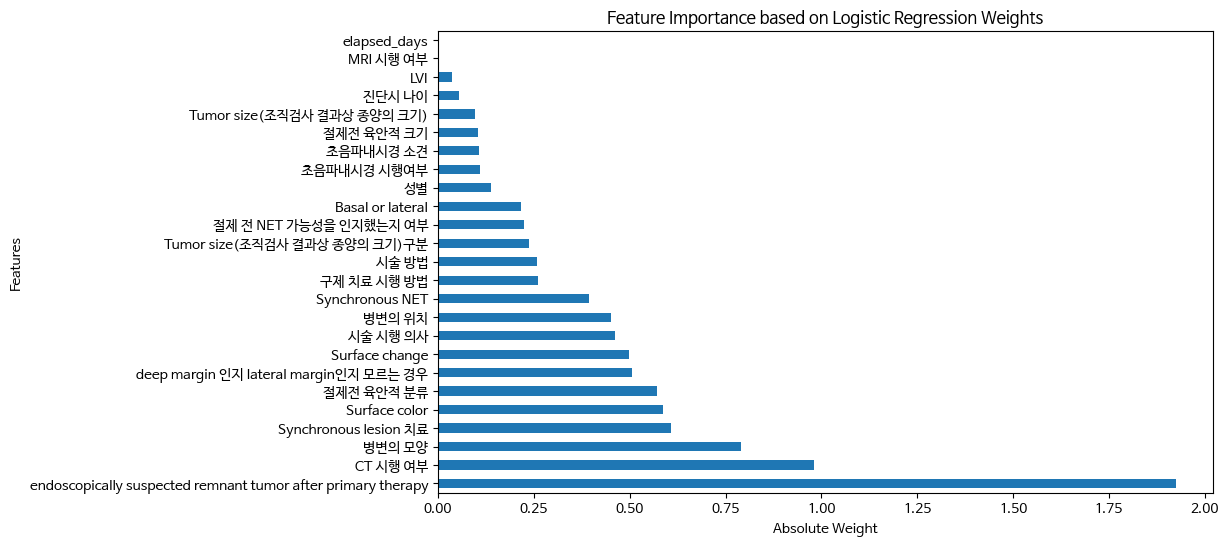

In [140]:
# 피처 가중치 추출
weights = pd.Series(log_reg.coef_[0], index=X.columns)

# 가중치를 절대값 기준으로 정렬
sorted_weights = weights.abs().sort_values(ascending=False)

# 정렬된 가중치 출력
print(sorted_weights)

# 가중치 시각화
plt.figure(figsize=(10, 6))
sorted_weights.plot(kind='barh')
plt.xlabel('Absolute Weight')
plt.ylabel('Features')
plt.title('Feature Importance based on Logistic Regression Weights')
plt.show()

In [141]:
# 피처 가중치 추출
n=10
weights = pd.Series(log_reg.coef_[0], index=X.columns)
top_features = weights.abs().nlargest(n).index
print("Top 10 Important Features:\n", top_features)

Top 10 Important Features:
 Index(['endoscopically suspected remnant tumor after primary therapy',
       'CT 시행 여부', '병변의 모양', 'Synchronous lesion 치료', 'Surface color',
       '절제전 육안적 분류', 'deep margin 인지 lateral margin인지 모르는 경우',
       'Surface change', '시술 시행 의사', '병변의 위치'],
      dtype='object')


In [142]:
from sklearn.metrics import roc_curve

# 상위 10개의 피처만 선택
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# 선택된 피처 가중치
weights_top = weights[top_features]

# 가중치 할당
# weight1, weight2, weight3, weight4, weight5, weight6, weight7 = weights_top.values
weight1, weight2, weight3, weight4, weight5, weight6, weight7, weight8, weight9, weight10 = weights_top.values

weights_top2=[]
for i, weight in enumerate(weights_top.values, 1):
    weight = round(weight, 2)
    weights_top2.append(weight)
    print(f"Weight{i}:", weight)
    
# print("Weight1:", weight1)
# print("Weight2:", weight2)
# print("Weight3:", weight3)
# print("Weight4:", weight4)
# print("Weight5:", weight5)
# print("Weight6:", weight6)
# print("Weight7:", weight7)
# print("Weight8:", weight8)
# print("Weight9:", weight9)
# print("Weight10:", weight10)
# print("Weight11:", weight11)

# 스코어링 시스템 함수 정의
def scoring_system(X, weights):
    scores = X.dot(weights)
    return scores

# 훈련 세트와 테스트 세트에 대해 스코어 계산
train_scores = scoring_system(X_train_top, weights_top2)
test_scores = scoring_system(X_test_top, weights_top2)

# ROC 커브를 사용하여 최적의 임계값 찾기
fpr, tpr, thresholds = roc_curve(y_test, test_scores)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)
optimal_threshold = round(optimal_threshold, 2)
print(optimal_threshold) 

Weight1: 1.92
Weight2: -0.98
Weight3: 0.79
Weight4: 0.61
Weight5: -0.59
Weight6: 0.57
Weight7: 0.51
Weight8: -0.5
Weight9: 0.46
Weight10: 0.45
Optimal Threshold: 3.98
3.98


In [143]:
# 최적의 임계값을 사용하여 예측
y_train_pred = (train_scores > optimal_threshold).astype(int)
y_test_pred = (test_scores > optimal_threshold).astype(int)

# 성능 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Scoring System on Training Data:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

print("Scoring System on Test Data:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Scoring System on Training Data:
Accuracy: 0.7894736842105263
Confusion Matrix:
 [[76 14]
 [14 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        90
           1       0.67      0.67      0.67        43

    accuracy                           0.79       133
   macro avg       0.76      0.76      0.76       133
weighted avg       0.79      0.79      0.79       133

Scoring System on Test Data:
Accuracy: 0.8070175438596491
Confusion Matrix:
 [[35  4]
 [ 7 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86        39
           1       0.73      0.61      0.67        18

    accuracy                           0.81        57
   macro avg       0.78      0.75      0.77        57
weighted avg       0.80      0.81      0.80        57



In [144]:
import random
# 랜덤으로 1개의 샘플 선택
random_index = random.randint(0, len(X_test_top) - 1)
random_sample = X_test_top.iloc[random_index]
actual_value = y_test.iloc[random_index]

# 선택된 샘플 출력
print("Random Sample Index:", random_index)
print("Random Sample:\n", random_sample)
print("Actual Value:", actual_value)

# 스코어링 시스템을 사용하여 예측
sample_score = scoring_system(random_sample, weights_top)
print("sample_score:", sample_score)
print("optimal_threshold:", optimal_threshold)

predicted_value = 1 if sample_score > optimal_threshold else 0

# 예측 결과 출력
print("Predicted Value:", predicted_value)

Random Sample Index: 11
Random Sample:
 endoscopically suspected remnant tumor after primary therapy    1.0
CT 시행 여부                                                        1.0
병변의 모양                                                          1.0
Synchronous lesion 치료                                           0.0
Surface color                                                   1.0
절제전 육안적 분류                                                      1.0
deep margin 인지 lateral margin인지 모르는 경우                          1.0
Surface change                                                  1.0
시술 시행 의사                                                        3.0
병변의 위치                                                          3.0
Name: 151, dtype: float64
Actual Value: 1
sample_score: 4.467539063732458
optimal_threshold: 3.98
Predicted Value: 1
